In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dalex = pd.read_csv("dalex.csv") # wyciągnięty z R za pomocą DALEX::apartments %>% write.csv("dalex.csv", row.names = F)
wine = pd.read_csv("https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/wine_dataset.csv")

In [3]:
seed = 7

# Szybka eksploracja

## DALEX apartments

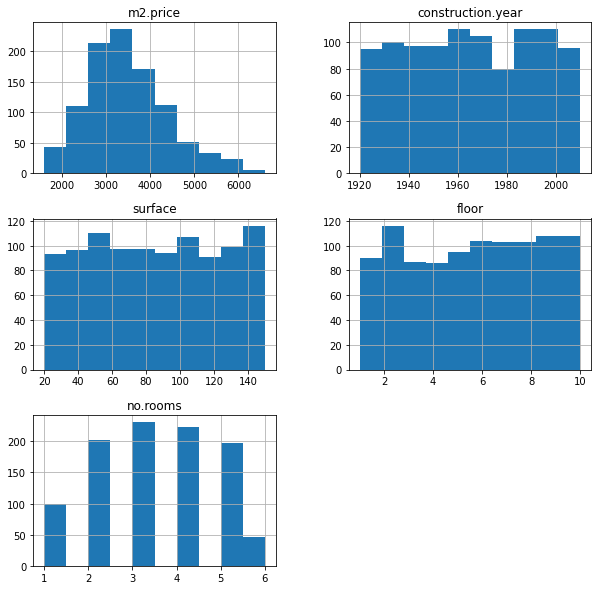

In [204]:
dalex.hist(figsize=(10, 10))
plt.show()

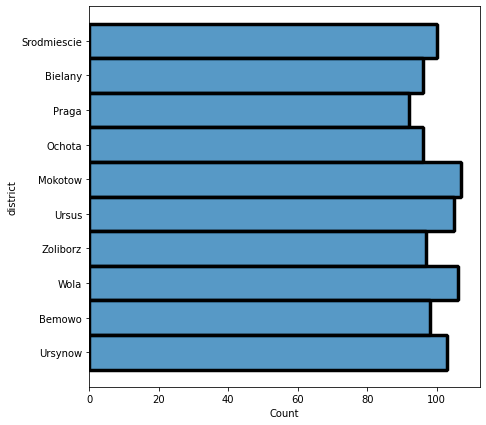

In [5]:
plt.figure(figsize=(7,7))
sns.histplot(data=dalex, y="district")
plt.show() # nowy styl seaborna? robię w notebooku lokalnym

Większość cech i etykiet jest równomiernie rozłożona, za wyjątkiem:
* m2.price, która wygląda na lekko przechylony rozkład normalny
* no.rooms, która wygląda na rozkład normalny

## Wina
Inny zbiór, opisujący klasy wina i pewne chemiczne pomiary. 
Pochodzi z [apispreadsheets.com](https://apispreadsheets.com/datasets/117)

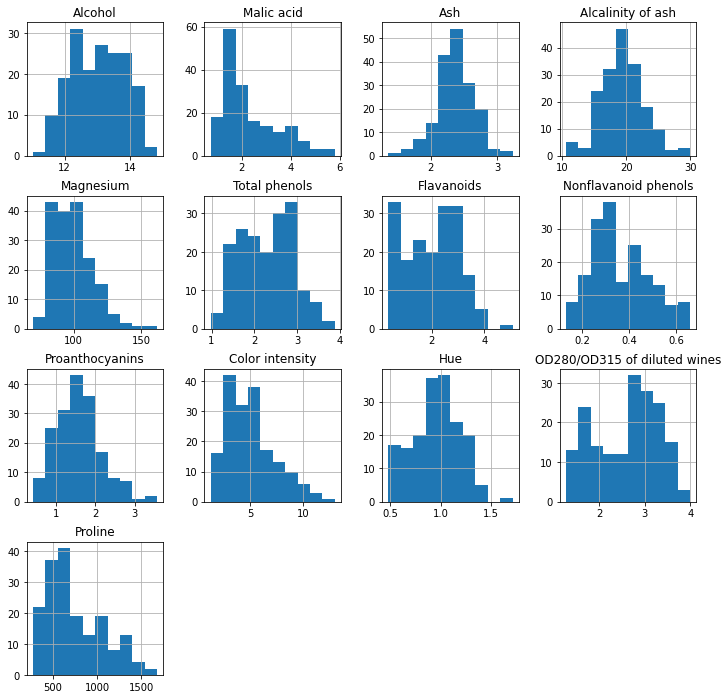

In [205]:
wine.hist(figsize=(12, 12))
plt.show()

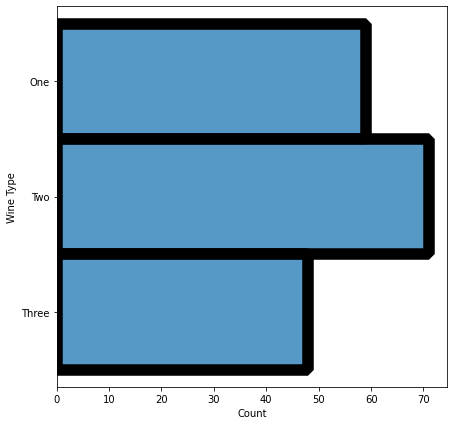

In [7]:
plt.figure(figsize=(7,7))
sns.histplot(data=wine, y="Wine Type")
plt.show() # nie podoba mi się ten nowy sns...

Tutaj prawie każda zmienna ma jakąś krzywą, nie ma równomiernych rozkładów.

# Preprocessing
Przygotowałem preprocessing zwykły, w którym tylko koduję etykietę oraz preprocessing skalowany, w którym skaluję cechy za pomocą MinMaxScaler i Normalizera (o tych sposobach jest mowa w artykule). Porównam te trzy podejścia.

## DALEX apartments

In [8]:
def lazy_train_test_split(df_, seed=seed, size=0.25):
    # muszę się nauczyć pipeline'ów...
    return train_test_split(df_.iloc[:, :-1], df_.iloc[:, -1], stratify=df_.iloc[:, -1], random_state=seed, test_size=size)

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split

district_encoder = LabelEncoder()
df_d = dalex.copy()
df_d.iloc[:, -1] = district_encoder.fit_transform(df_d.iloc[:, -1])

sets_d = lazy_train_test_split(df_d)

df_d

,m2.price,construction.year,surface,floor,no.rooms,district
0,5897,1953,25,3,1,5
1,1818,1992,143,9,5,1
2,3643,1937,56,1,2,4
3,3517,1995,93,7,3,3
4,3013,1992,144,6,5,2
...,...,...,...,...,...,...
995,6355,1921,44,2,2,5
996,3422,1921,48,10,2,0
997,3098,1980,85,3,3,0
998,4192,1942,36,7,1,9


In [10]:
dalex_mm_scaler = MinMaxScaler()
df_d_mm = df_d.copy()
df_d_mm.iloc[:, :-1] = dalex_mm_scaler.fit_transform(df_d_mm.iloc[:, :-1])

sets_d_mm = lazy_train_test_split(df_d_mm)

df_d_mm

,m2.price,construction.year,surface,floor,no.rooms,district
0,0.860064,0.366667,0.038462,0.222222,0.0,5
1,0.042302,0.800000,0.946154,0.888889,0.8,1
2,0.408180,0.188889,0.276923,0.000000,0.2,4
3,0.382919,0.833333,0.561538,0.666667,0.4,3
4,0.281877,0.800000,0.953846,0.555556,0.8,2
...,...,...,...,...,...,...
995,0.951885,0.011111,0.184615,0.111111,0.2,5
996,0.363873,0.011111,0.215385,1.000000,0.2,0
997,0.298917,0.666667,0.500000,0.222222,0.4,0
998,0.518244,0.244444,0.123077,0.666667,0.0,9


In [11]:
dalex_normalizer = Normalizer()
df_d_n = df_d.copy()
df_d_n.iloc[:, :-1] = dalex_normalizer.fit_transform(df_d_n.iloc[:, :-1])

sets_d_n = lazy_train_test_split(df_d_n)

df_d_n

,m2.price,construction.year,surface,floor,no.rooms,district
0,0.949285,0.314389,0.004024,0.000483,0.000161,5
1,0.673161,0.737588,0.052949,0.003332,0.001851,1
2,0.882868,0.469425,0.013571,0.000242,0.000485,4
3,0.869575,0.493262,0.022994,0.001731,0.000742,3
4,0.833510,0.551063,0.039836,0.001660,0.001383,2
...,...,...,...,...,...,...
995,0.957202,0.289345,0.006627,0.000301,0.000301,5
996,0.871929,0.489473,0.012230,0.002548,0.000510,0
997,0.842381,0.538385,0.023112,0.000816,0.000816,0
998,0.907334,0.420335,0.007792,0.001515,0.000216,9


In [12]:
np.sum(np.square(df_d_n.iloc[0, :-1]))

1.0

## Wina

In [13]:
wine_class_encoder = LabelEncoder()
df_w = wine.copy()
df_w.iloc[:, -1] = wine_class_encoder.fit_transform(df_w.iloc[:, -1])

sets_w = lazy_train_test_split(df_w, size=0.4) # większy rozmiar testów, bo zbiór mały

df_w

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1


In [14]:
wine_scaler = MinMaxScaler()

df_w_mm = df_w.copy()
df_w_mm.iloc[:, :-1] = wine_scaler.fit_transform(df_w_mm.iloc[:, :-1])

sets_w_mm = lazy_train_test_split(df_w_mm, size=0.4)

df_w_mm

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1


In [15]:
wine_normalizer = Normalizer()

df_w_n = df_w.copy()
df_w_n.iloc[:, :-1] = wine_normalizer.fit_transform(df_w_n.iloc[:, :-1])

sets_w_n = lazy_train_test_split(df_w_n, size=0.4)

df_w_n

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,0
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,0
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,0
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,0
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225,1
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194,1
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336,1
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482,1


In [16]:
np.sum(np.square(df_w_n.iloc[0, :-1]))

0.9999999999999999

# SVM Bez tuningu

## DALEX apartments 
### Bez skalowania

In [17]:
from sklearn.svm import SVC, LinearSVC

svc_d = SVC(probability=True)
svc_d = svc_d.fit(sets_d[0], sets_d[2])

In [18]:
# helper do rysowania macierzy pomyłek (?)
def plot_train_test_confusion(model, sets):
    X_train_ , X_test_, y_train_ , y_test_ = sets
    
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(model, X_train_, y_train_)
    plt.show()
    plot_confusion_matrix(model, X_test_, y_test_)
    plt.show()

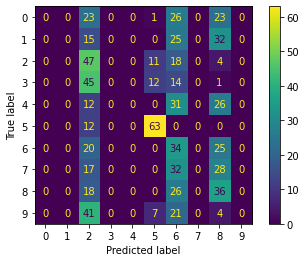

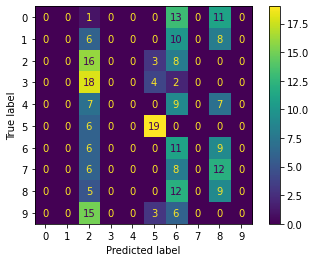

In [19]:
plot_train_test_confusion(svc_d, sets_d)

In [20]:
# helper do wypisywania wyników
def print_scores(model, sets):
    from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
    X_train_ , X_test_, y_train_ , y_test_ = sets
    
    y_predict_train_ = model.predict(X_train_)
    y_predict_ = model.predict(X_test_)
    y_proba_ = model.predict_proba(X_test_)
    
    print(
        "Accuracy score: {:.4f} (Train)\n"
        "Accuracy score: {:.4f} (Test)\n"
        " ROC_AUC score: {:.4f} (One v One, Weighted)\n"
        " ROC_AUC score: {:.4f} (One v Rest, Weighted)\n"
        "      F1 score: {:.4f} (Weighted)\n"
        .format(
            accuracy_score(y_train_, y_predict_train_),
            accuracy_score(y_test_, y_predict_),
            roc_auc_score(y_test_, y_proba_, multi_class="ovo", average="weighted"),
            roc_auc_score(y_test_, y_proba_, multi_class="ovr", average="weighted"),
            f1_score(y_test_, y_predict_, average="weighted")
        )
    )

In [21]:
print_scores(svc_d, sets_d)

Accuracy score: 0.2400 (Train)
Accuracy score: 0.2200 (Test)
 ROC_AUC score: 0.7325 (One v One, Weighted)
 ROC_AUC score: 0.7324 (One v Rest, Weighted)
      F1 score: 0.1456 (Weighted)



Celność rzędu 0.20 nas niezadowala, więc trzeba zastosować tuning lub skalowanie.
AUC_ROC ma niezłe wyniki, co może wskazywać na dużą niepewność modelu.
Model daje małe prawdopodobieństwo dla swoich predykcji, ale ta informacja zanika w przypadku miar accuracy i F1.

Model również z jakiegoś powodu przewiduje mały podzbiór etykiet, co tworzy pionowe "smugi" na macierzy pomyłek.

### MinMax Skalowany

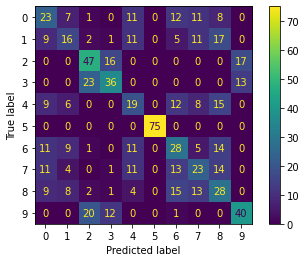

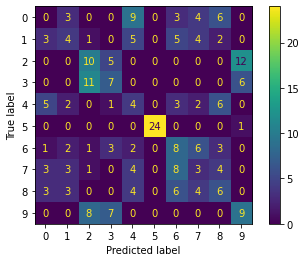

Accuracy score: 0.4467 (Train)
Accuracy score: 0.3000 (Test)
 ROC_AUC score: 0.8157 (One v One, Weighted)
 ROC_AUC score: 0.8159 (One v Rest, Weighted)
      F1 score: 0.2940 (Weighted)



In [22]:
from sklearn.svm import SVC, LinearSVC

svc_d_mm = SVC(probability=True)
svc_d_mm = svc_d_mm.fit(sets_d_mm[0], sets_d_mm[2])

plot_train_test_confusion(svc_d_mm, sets_d_mm)

print_scores(svc_d_mm, sets_d_mm)

Lepiej wygląda, ale nadal nie jest wybitny, więc pewnie trzeba będzie dobierać hiperparametry.

### Normalizowany

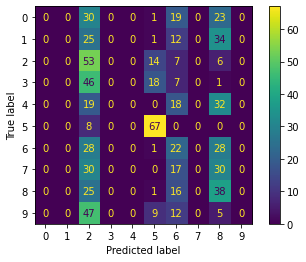

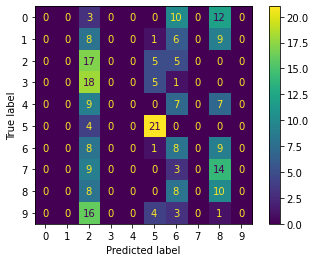

Accuracy score: 0.2400 (Train)
Accuracy score: 0.2240 (Test)
 ROC_AUC score: 0.7328 (One v One, Weighted)
 ROC_AUC score: 0.7328 (One v Rest, Weighted)
      F1 score: 0.1419 (Weighted)



In [23]:
svc_d_n = SVC(probability=True)
svc_d_n = svc_d_n.fit(sets_d_n[0], sets_d_n[2])

plot_train_test_confusion(svc_d_n, sets_d_n)

print_scores(svc_d_n, sets_d_n)

Wyniki BARDZO podobne do tych bez żadnego skalowania - prawdopodobnie SVC korzysta z tej transformacji wewnętrznie, ale wyniki pokazują, że może to nie być najlepszy sposób

In [206]:
# po wykonaniu tego zobaczyłem, że to miało być zadanie regresji, a nie klasyfikacji.
# ups

## Wina
### Bez skalowania

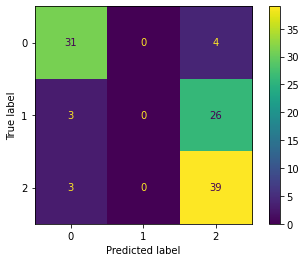

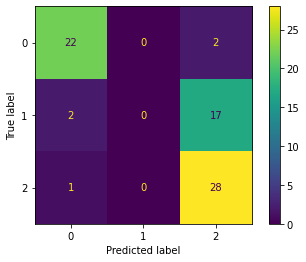

Accuracy score: 0.6604 (Train)
Accuracy score: 0.6944 (Test)
 ROC_AUC score: 0.9030 (One v One, Weighted)
 ROC_AUC score: 0.9083 (One v Rest, Weighted)
      F1 score: 0.5961 (Weighted)



In [24]:
svc_w = SVC(probability=True)
svc_w = svc_w.fit(sets_w[0], sets_w[2])
plot_train_test_confusion(svc_w, sets_w)
print_scores(svc_w, sets_w)

### MinMax Skalowany

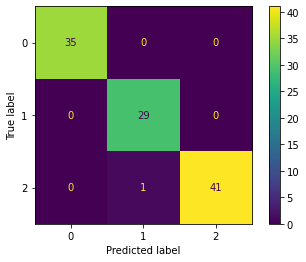

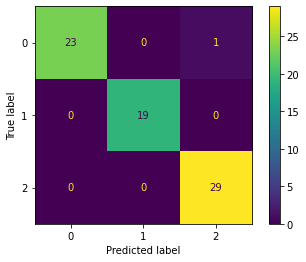

Accuracy score: 0.9906 (Train)
Accuracy score: 0.9861 (Test)
 ROC_AUC score: 0.9995 (One v One, Weighted)
 ROC_AUC score: 0.9994 (One v Rest, Weighted)
      F1 score: 0.9861 (Weighted)



In [25]:
svc_w_mm = SVC(probability=True)
svc_w_mm = svc_w_mm.fit(sets_w_mm[0], sets_w_mm[2])
plot_train_test_confusion(svc_w_mm, sets_w_mm)
print_scores(svc_w_mm, sets_w_mm)

Prawie perfekcyjny.

### Normalizowany

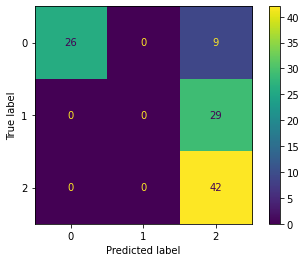

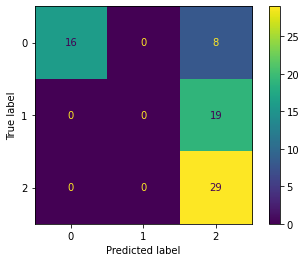

Accuracy score: 0.6415 (Train)
Accuracy score: 0.6250 (Test)
 ROC_AUC score: 0.8631 (One v One, Weighted)
 ROC_AUC score: 0.8687 (One v Rest, Weighted)
      F1 score: 0.5415 (Weighted)



In [26]:
svc_w_n = SVC(probability=True)
svc_w_n = svc_w_n.fit(sets_w_n[0], sets_w_n[2])
plot_train_test_confusion(svc_w_n, sets_w_n)
print_scores(svc_w_n, sets_w_n)

Na zbiorze danych z winami jest podobna historia, ale normalizacja pogorszyła wyniki (z wyjątkiem ROC AUC).

Z MinMaxScaler działa tak dobrze, że według mnie nie warto robić tuningu hiperparametrów - mam nadzieję, że porównanie skalowań zastąpi ten punkt.

# Tuning

Z powodu powyższych wyników, dalej zajmuję się tylko zbiorem apartments z biblioteki DALEX, przekształconym za pomocą MinMaxScalera.

In [165]:
from sklearn.model_selection import StratifiedKFold
skf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [191]:
expon(0.5, 5).rvs(50)

array([ 0.83156025,  0.52724832,  8.05615869, 10.96099815,  1.54556112,
        4.19844547,  1.90075745, 17.70064399,  7.42474439, 34.28193292,
        0.91784148,  3.9499529 ,  9.21342327,  1.20850277,  7.11665638,
        2.44213533,  0.7692857 ,  3.09207611,  0.56438406,  2.58254515,
        1.18414697, 11.35538883,  2.23887098,  4.09568561,  4.11352352,
        1.76583018,  4.11673689,  5.05146912,  8.43904895, 12.83979178,
        0.70539811,  0.94093063,  4.72045338,  2.12537562,  1.911031  ,
        0.63592892,  3.90131802, 13.70686015,  0.78964632,  0.54093607,
       12.44837427,  2.36291092,  0.72277242, 10.53912848,  3.23105767,
        2.73960611,  4.20537385,  4.53713305,  0.73830582,  5.47993576])

In [192]:
from scipy.stats import poisson, expon, norm
grid = {
    "C": expon(0.5, 5),
    "gamma": expon(0, 0.3),
    "kernel": ["rbf", "poly"],
    "degree": poisson(2, 3)
}

In [198]:
from sklearn.model_selection import RandomizedSearchCV
rscv_d = RandomizedSearchCV(
    estimator=SVC(probability=True),
    param_distributions=grid,
    cv=skf5,
    verbose=10,
    n_jobs=-1,
    n_iter=500,
    scoring="f1_weighted"
)

In [200]:
rscv_d.fit(sets_d_mm[0],sets_d_mm[2])

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
                   estimator=SVC(probability=True), n_iter=500, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd82c1d0df0>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd827d6f2e0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd82c1d0610>,
                                        'kernel': ['rbf', 'poly']},
                   scoring='f1_weighted', verbose=10)

In [201]:
rscv_d.best_params_

{'C': 20.107003994945277,
 'degree': 3,
 'gamma': 0.8478488203167378,
 'kernel': 'rbf'}

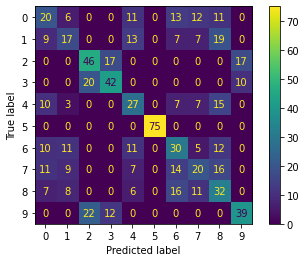

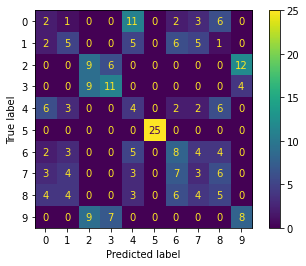

Accuracy score: 0.4640 (Train)
Accuracy score: 0.3200 (Test)
 ROC_AUC score: 0.8140 (One v One, Weighted)
 ROC_AUC score: 0.8140 (One v Rest, Weighted)
      F1 score: 0.3183 (Weighted)



In [202]:
plot_train_test_confusion(rscv_d.best_estimator_, sets_d_mm)
print_scores(rscv_d.best_estimator_, sets_d_mm)

In [190]:
print_scores(svc_d_mm, sets_d_mm)

Accuracy score: 0.4467 (Train)
Accuracy score: 0.3000 (Test)
 ROC_AUC score: 0.8157 (One v One, Weighted)
 ROC_AUC score: 0.8159 (One v Rest, Weighted)
      F1 score: 0.2940 (Weighted)



Model z tuningowania hiperparametrów można uznać za odrobinę lepszy, ale nie ma dużego efektu.